<div align="center">
    <h1>
        Ecuaciones diferenciales ordinarias y sistemas de ecuaciones                                 diferenciales ordinarias
    </h1>
</div>


<p style="text-align: justify;">
El presente documento es una guía cuyo objetivo es resolver problemas asociados con ecuaciones diferenciales ordinarias (EDO) y sistemas de ecuaciones diferenciales ordinarias (SEDO), a través de los métodos numéricos Euler y Runge Kutta orden 2 y 4.
</p>

<h2> Iportamos librerias</h2>
<p>Las librerías que emplearemos son Sympy, Numpy y matplotlib</p>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

<h2>Problema 1:</h2>
<p style="text-align: justify;"> 
    Un tanque perfectamente agitado contiene 400L de una salmuera en la cual están disueltos     25kg de sal común (NaCl), en un instante de tiempo entra al tanque un flujo de 80L/min       de una salmuera que contiene 0.5kg de sal/L. Si se tiene un flujo de salida de 80 L/min,     responda:
<p>
<ol type="a">
    <li>¿Qué cantidad de sal hay en el tanque transcurridos 10min?</li>
    <li>Si pasa mucho tiempo, ¿qué pasa con la cantidad de sal en el tanque?</li>
</ol> 
<p style="text-align: justify;">
Use el principio de conservación de la masa (para la sal), relacionando las variables mediante el balance de masa (𝑎𝑐𝑢𝑚𝑢𝑙𝑎𝑐𝑖ó𝑛=𝑒𝑛𝑡𝑟𝑎−𝑠𝑎𝑙𝑒) para obtener la ecuación diferencial correspondiente que deberá resolver por el método de Euler y Heun.
</p>

<h2>Solución:</h2>
<ol type="a">
    <li>¿Qué cantidad de sal hay en el tanque transcurridos 10min?</li>
</ol>
<p>Primero obtenemos la ecuación diferencial que describle el problema: <p>

$$
\begin{align*}
    \frac{dx}{dt} = 80\frac{l}{min}*0.5\frac{kg}{l} - 80\frac{l}{min}*\frac{x}{400}\frac{kg}{l}
\end{align*}
$$
$$
\begin{align*}
    \frac{dx}{dt} = 40 \frac{kg}{min} - \frac{x}{5}\frac{kg}{min} \\
\end{align*}
$$
$$
\begin{align*}
    \frac{dx}{dt} = 40 - \frac{x}{5}
\end{align*}
$$

<p>Ahora encontramos la solución exacta de la ecuación. Para ellos emplearemos la librería Sympy:</p>

In [2]:
# definir las incognitas
x = sp.Function('x')
t = sp.S('t')

In [3]:
# definir la ecuación
eq = 40 - x(t)/5
# Condición inicial
x0 = {x(0): 25}
# resolver la ecuación
edo_sol = sp.dsolve(x(t).diff(t) - eq)
edo_sol

Eq(x(t), C1*exp(-t/5) + 200)

In [4]:
# encontrar el valor de la constante C1
C_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(x0), edo_sol.rhs.subs(t, 0))
C_eq

Eq(25, C1 + 200)

In [5]:
sp.solve(C_eq)

[-175]

Por lo tanto la solución exacta de la ecuación diferencial es:

$$
\begin{align*}
    x(t) = 200 - 175 e^{-\frac{t}{5}}
\end{align*}
$$

<h3>Solución con el método de euler</h3>

In [6]:
# definimos parametros iniciales
a = 0
b = 10
n = 20
x0 = 25.0

In [7]:
# Método Euler
def euler(f, fs, x0, a, b, n):
    # inicializamos valores
    x = np.zeros(n+1)
    t = np.zeros(n+1)
    # variable para guardar la solución exacta de la ecuación
    xSolucion = np.zeros(n+1)
    # valor inicial
    x[0] = x0
    xSolucion[0] = x0
    h = (b - a) / n
    for i in range(n):
        x[i + 1] = x[i] + h * f(t[i] , x[i])
        t[i + 1] = t[i] + h
        xSolucion[i + 1] = fs(t[i + 1], x[ i + 1])
    return t, x, xSolucion

<h4>definimos las funciones</h4>

In [8]:
# ecuación diferencial a resolver
def funcion(t, x):
    return 40-x/5
# ecuación de la solución exacta
def solExacta(t, x):
    return 200-175*np.exp(-t/5)

In [9]:
# resolvemos la ecuación con el método euler
t, x, xSolucion = euler(funcion, solExacta, x0, a, b, n)

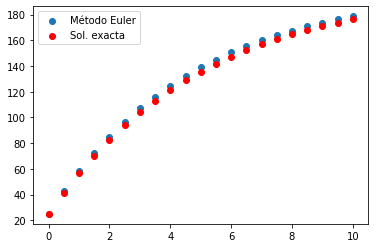

In [10]:
# gráfica solucion método euler
plt.scatter(t,x, label='Método Euler')
# gráfica solución exacta
plt.scatter(t,xSolucion, label='Sol. exacta', color='red')
plt.legend()

In [11]:
# imprimir resultados
print("solución método Euler: ", x[-1])
print("solución exacta: ", xSolucion[-1])
# calcular porcentaje error 
error = 100*np.abs(x[-1]-xSolucion[-1])/xSolucion[-1]
print("error: %f" % (error) + "%")

solución método Euler:  178.72408544665038
solución exacta:  176.31632543359277
error: 1.365591%


<h3>Solución método Heun</h3>

In [12]:
# Método Heun
def heun(f, fs, x0, a, b, n):
    # inicializamos valores
    x = np.zeros(n+1)
    t = np.zeros(n+1)
    # variable para guardar la solución exacta de la ecuación
    xSolucion = np.zeros(n+1)
    # valor inicial
    x[0] = x0
    xSolucion[0] = x0
    h = (b - a) / n
    for i in range(n):
        k1 = f(t[i], x[i])
        k2 = f(t[i] + h, x[i] + k1 * h)
        x[i+1] = x[i] + (k1 + k2) * h/2
        t[i+1] = t[i] + h
        xSolucion[i+1] = fs(t[i+1], x[i+1])
    return t, x, xSolucion

In [13]:
# resolvemos la ecuación con el método Heun
t, x, xSolucion = heun(funcion, solExacta, x0, a, b, n)

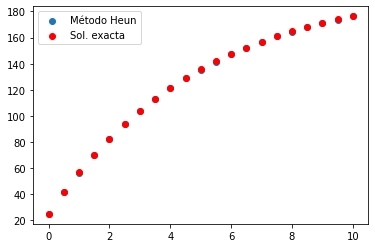

In [14]:
# gráfica solucion método Heun
plt.scatter(t,x, label='Método Heun')
# gráfica solución exacta
plt.scatter(t,xSolucion, label='Sol. exacta', color='red')
plt.legend()

In [15]:
print("solución método Heun: ", x[-1])
print("solución exacta", xSolucion[-1])
# calcular porcentaje error 
error = 100*np.abs(x[-1]-xSolucion[-1])/xSolucion[-1]
print("error %f" % (error) + "%")

solución método Heun:  176.23106993713526
solución exacta 176.31632543359277
error 0.048354%


<p>
    b. Si pasa mucho tiempo, ¿qué pasa con la cantidad de sal en el tanque?</li>
</p>

In [16]:
# definimos variable t
t = sp.S('t')
# definimos ecuación
x = 200-175*sp.exp(-t/5)
# hacemos limite cuanto t -> oo
resultado = sp.limit(x, t, 'oo')

print("Cuando pasa mucho tiempo la cantidad de sal es: %i Kg" % (resultado))

Cuando pasa mucho tiempo la cantidad de sal es: 200 Kg


<h2>Problema 2</h2>
<p style="text-align: justify;">
    El atractor de Lorenz es una relación caótica caracterizada por su forma de mariposa.        Esta relación permite ver como evoluciona un sistema dinámico en un patrón no repetitivo     complejo. El atractor de Lorenz es un sistema dinámico, determinista, tridimensional, no     lineal, derivado a partir de una simplificación de las complejas ecuaciones de la            atmosfera convectiva. Ciertos parámetros del sistema exhiben un comportamiento caótico y     despliegan lo que se conoce como el atractor extraño. Este atractor es un fractal, que       surge en láseres, dinamos y algunos generadores de energía mecánica que aprovechan el        flujo de agua en ríos y cascadas.
</p>
<p>
    Las ecuaciones de Lorenz están dadas por:
</p>

$$
\begin{align*}
    \frac{dx}{dt} = \sigma (y - x)
\end{align*}
$$
$$
\begin{align*}
    \frac{dy}{dt} = x (\rho - z) - y
\end{align*}
$$
$$
\begin{align*}
    \frac{dz}{dt} = x y - \beta z
\end{align*}
$$

<p>
    Donde 𝜎 es el número de Prandtl y 𝜌 el número de Rayleigh. Generalmente 𝜎=10, 𝛽=8/3     y 𝜌 suele variar siendo positivo, exhibiendo un valor de 𝜌=28 para un sistema caótico.
</p>

<ol type="a">
    <li>
        Resolver el sistema de Lorenz con las siguientes condiciones iniciales 𝑥(0)=2, 𝑦(0)        =6, 𝑧(0)=4. Use el método de Runge Kutta de orden 4.
    </li>
    <li>
        Defina tamaño de paso y use como punto el final de iteración 𝑡=60. Realice las              gráficas de 𝑥 vs 𝑦 y 𝑥 vs 𝑧.
    </li>
    <li>
        Realizar una grafica de las tres variables (𝑥,𝑦,𝑧 vs 𝑡)
    </li>
</ol>

<h2>Solución</h2>
<p>Primero reemplazamos los valores de los parametros en el sistema de ecuaciones:</p>

$$
\begin{align*}
    \frac{dx}{dt} = 10 (y - x)
\end{align*}
$$
$$
\begin{align*}
    \frac{dy}{dt} = x (28 - z) - y
\end{align*}
$$
$$
\begin{align*}
    \frac{dz}{dt} = x y - \frac{8}{3} z
\end{align*}
$$

a. Resolver el sistema de Lorenz con las siguientes condiciones iniciales 𝑥(0)=2, 𝑦(0)        =6, 𝑧(0)=4. Use el método de Runge Kutta de orden 4.

In [17]:
# definimos las ecuaciones
def f(x, y, z, t):
    return 10*(y-x)
def g(x, y, z, t):
    return x*(28-z)-y
def k(x, y, z, t):
    return x*y-z*8/3

In [18]:
def sistema_runge_kutta(f, g, k, x0, y0, z0, a, b, n):
    # inicializar valores
    h = (b - a) / n
    t = np.zeros(n+1)
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    # condiciones iniciales
    x[0] = x0
    y[0] = y0
    z[0] = z0
    for i in range(n):
        # calcular k1
        k1 = f(x[i], y[i], z[i], t[i])
        l1 = g(x[i], y[i], z[i], t[i])
        m1 = k(x[i], y[i], z[i], t[i])
        # calcular k2
        k2 = f(x[i] + h*k1 / 2, y[i] + h*l1 / 2, z[i] + h*m1/2, t[i])
        l2 = g(x[i] + h*k1 / 2, y[i] + h*l1 / 2, z[i] + h*m1/2, t[i])
        m2 = k(x[i] + h*k1 / 2, y[i] + h*l1 / 2, z[i] + h*m1/2, t[i])
        # calcular k3
        k3 = f(x[i] + h*k2 / 2, y[i] + h*l2 / 2, z[i] + h*m2/2, t[i])
        l3 = g(x[i] + h*k2 / 2, y[i] + h*l2 / 2, z[i] + h*m2/2, t[i])
        m3 = k(x[i] + h*k2 / 2, y[i] + h*l2 / 2, z[i] + h*m2/2, t[i])
        # calcular k4
        k4 = f(x[i] + h*k3, y[i] + h*l3, z[i] + h*m3, t[i])
        l4 = g(x[i] + h*k3, y[i] + h*l3, z[i] + h*m3, t[i])
        m4 = k(x[i] + h*k3, y[i] + h*l3, z[i] + h*m3, t[i])
        # calcular nuevo valor de X
        x[i + 1] = x[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)*h
        y[i + 1] = y[i] + (1 / 6) * (l1 + 2 * l2 + 2 * l3 + l4)*h
        z[i + 1] = z[i] + (1 / 6) * (m1 + 2 * m2 + 2 * m3 + m4)*h
        t[i + 1] = t[i] + h
    return t, x, y, z

In [19]:
# definimos condiciones iniciales
x0 = 2; y0 = 6; z0 = 4
# parametros runge kutta
n = 1000; a = 0; b = 60
# resolvemos el sistema de ecuaciones
t, x, y, z = sistema_runge_kutta(f, g, k, x0, y0, z0, a, b, n)

b. Defina tamaño de paso y use como punto el final de iteración 𝑡=60. Realice las              gráficas de 𝑥 vs 𝑦 y 𝑥 vs 𝑧.

In [20]:
print('x(60) = %f' % (x[-1]))
print('y(60) = %f' % (y[-1]))
print('z(60) = %f' % (z[-1]))

x(60) = 5.300437
y(60) = 8.731420
z(60) = 15.417057


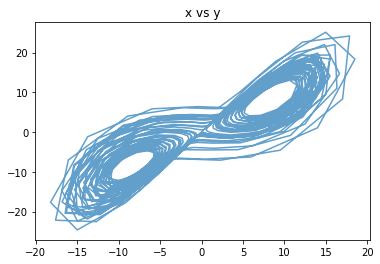

In [21]:
# gráfica x vs y
plt.plot(x,y, alpha=0.7)
plt.title('x vs y')
plt.show()

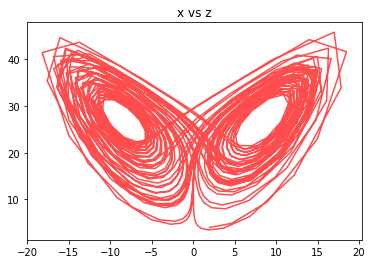

In [22]:
# gráfica x vs z
plt.plot(x, z, alpha=0.7, color='r')
plt.title('x vs z')
plt.show()

c. Realizar una grafica de las tres variables (𝑥,𝑦,𝑧 vs 𝑡)

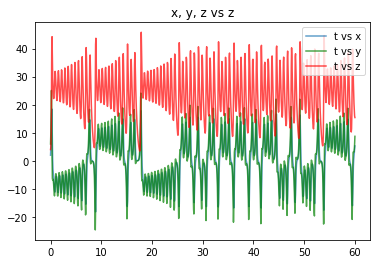

In [23]:
# gráfica x, y, z vs t
plt.plot(t, x, alpha=0.7, label='t vs x')
plt.plot(t, y, alpha=0.7, color='g', label='t vs y')
plt.plot(t, z, alpha=0.7, color='r', label='t vs z')
plt.legend()
plt.title('x, y, z vs z')
plt.show()

<h2>Problema 3</h2>
<p style="text-align: justify;">
    Un lago contaminado tiene una concentración inicial de bacterias de 107 partes/L,            mientras que el nivel aceptable de partes/L es de solo de 5×106 partes/L. La                 concentración de bacterias se reducirá a medida que el agua dulce ingrese al lago. La        ecuación diferencial que gobierna la concentración C del contaminante en función del         tiempo (en semanas) viene dada por:
</p>

$$
\begin{align*}
    \frac{dC}{dt} + 0.06 C = 0
\end{align*}
$$

<ol type="a">
    <li>
        Use el método de Euler, un método de Runge Kutta de orden 2 y Runge Kutta de orden 4         para determinar la concentración del contaminante después de 7 semanas.
    </li>
    <li>
        Use diferentes tamaños de pasos (mínimo 3) ¿por qué escogió estos tamaños de paso?
    </li>
    <li>
        Analice la respuesta obtenida por los diferentes métodos numéricos y los diferentes          tamaños de paso.
    </li>    
</ol>

<h2>Solución</h2>
<p>
    primero calculamos la Solución exacta de la ecuación:
</p>

In [24]:
# definimos incognitas
c = sp.Function('c')
t = sp.S('t')

In [25]:
# definimos la ecuación
eq = -0.06*c(t)
# Condición inicial
c0 = {c(0): 1e7}
# Resolviendo la ecuación
edo_sol = sp.dsolve(c(t).diff(t) - eq)
edo_sol

Eq(c(t), C1*exp(-0.06*t))

In [26]:
# encontramos el valor de la constante C1
C_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(c0), edo_sol.rhs.subs(t, 0))
C_eq

Eq(10000000.0, C1)

<p>Por lo tanto la solución exacta al problema es:</p>

$$
\begin{align*}
    c(t) = 10^{7} e^{-0.06t}
\end{align*}
$$

<p>
a. Use el método de Euler, un método de Runge Kutta de orden 2 y Runge Kutta de orden 4         para determinar la concentración del contaminante después de 7 semanas.
</p>

In [27]:
# definimos las funciones

# función a resolver
def f(t,y):
    return -0.06*y
# función solución exacta
def fs(t,y):
    return 1e7*np.exp(-0.06*t)

<h3>Solución con el método de euler</h3>

In [28]:
# parametros método 
a = 0; b = 7; n = 7
# condición inicial
x0 = 1e7
# resolver la ecuación con el método 
t, solucion_euler, solucion_exacta = euler(f, fs, x0, a, b, n)

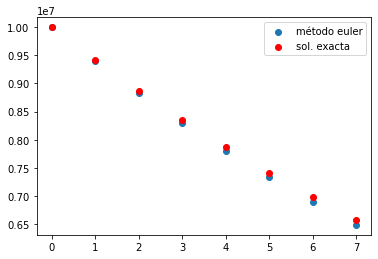

In [29]:
# gráfica solucion método euler
plt.scatter(t, solucion_euler, label = 'método euler')
# grafica solución exacta
plt.scatter(t, solucion_exacta, label = 'sol. exacta', color='red')
plt.legend()

<h3>Solución método Runge Kutta orden 2</h3>

In [30]:
def runge_kutta_2(f, fs, y0, a, b, n):
    h = (b-a)/n
    # inicializar valores
    t = np.zeros(n + 1)
    y = np.zeros(n + 1)
    solucion_exacta = np.zeros(n + 1)
    # condición inicial
    y[0] = y0
    solucion_exacta[0] = y0
    for i in range(n):
        # calcular valores de k1 y k2
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h, y[i] + k1*h)
        # calcular el nuevo valor de y y t
        y[i + 1] = y[i] + (1 / 2) * (k1 + k2)*h
        t[i + 1] = t[i] + h
        # calcular solución exacta
        solucion_exacta[i + 1] = fs(t[i + 1], y[ i + 1])
    return t, y, solucion_exacta

In [31]:
# parametros método 
a = 0; b = 7; n = 7
# condición inicial
x0 = 1e7
# resolver ecuación con el método de runge kutta orden 2
t, solucion_kutta_2, solucion_exacta = runge_kutta_2(f, fs, x0, a, b, n)

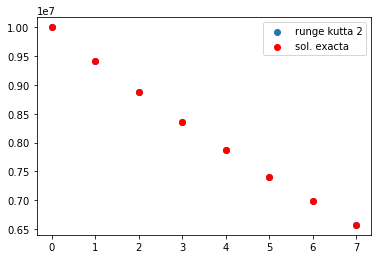

In [32]:
# gráfica solucion método runge kutta orden 2
plt.scatter(t, solucion_kutta_2, label = 'runge kutta 2')
# grafica solución exacta
plt.scatter(t, solucion_exacta, label = 'sol. exacta', color='red')
plt.legend()

<h3>Solución método Runge Kutta orden 4</h3>

In [33]:
def runge_kutta_4(f, fs, y0, a, b, n):
    h = (b-a)/n
    # inicializar valores
    t = np.zeros(n + 1)
    y = np.zeros(n + 1)
    solucion_exacta = np.zeros(n + 1)
    # condición inicial
    y[0] = y0
    solucion_exacta[0] = y0
    for i in range(n):
        # calcular valores de k1, k2, k3 y k4
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h / 2, y[i] + h*k1 / 2)
        k3 = f(t[i] + h / 2, y[i] + h*k2 / 2)
        k4 = f(t[i] + h, y[i] + k3*h)
        # calcular el nuevo valore de y y t 
        y[i + 1] = y[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)*h
        t[i + 1] = t[i] + h
        # calcular solución exacta
        solucion_exacta[i + 1] = fs(t[i + 1], y[ i + 1])
    return t, y, solucion_exacta

In [34]:
# parametros método 
a = 0; b = 7; n = 7
# condición inicial
x0 = 1e7
# resolver ecuación con el método de runge kutta orden 4
t, solucion_kutta_4, solucion_exacta = runge_kutta_4(f, fs, x0, a, b, n)

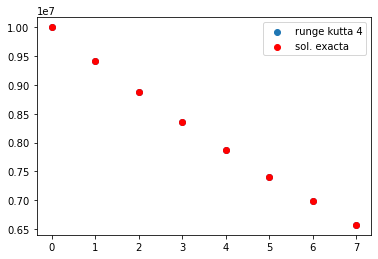

In [35]:
# gráfica solucion método runge kutta orden 2
plt.scatter(t, solucion_kutta_4, label = 'runge kutta 4')
# grafica solución exacta
plt.scatter(t, solucion_exacta, label = 'sol. exacta', color='red')
plt.legend()

In [36]:
print('la concentración del contaminante con el método de Euler después de 7 semanas es: %f con un porcentaje de error: %f' %(solucion_euler[-1], 100*(solucion_exacta[-1]-solucion_euler[-1])/solucion_exacta[-1]))
print('la concentración del contaminante con el método de Runge Kutta orden 2 después de 7 semanas es: %f con un porcentaje de error: %f' %(solucion_kutta_2[-1], 100*(solucion_kutta_2[-1]-solucion_exacta[-1])/solucion_exacta[-1]))
print('la concentración del contaminante con el método de Runge Kutta orden 4 después de 7 semanas es: %f con un porcentaje de error: %f' %(solucion_kutta_4[-1], 100*(solucion_kutta_4[-1]-solucion_exacta[-1])/solucion_exacta[-1]))

la concentración del contaminante con el método de Euler después de 7 semanas es: 6484775.941926 con un porcentaje de error: 1.304203
la concentración del contaminante con el método de Runge Kutta orden 2 después de 7 semanas es: 6572200.479356 con un porcentaje de error: 0.026365
la concentración del contaminante con el método de Runge Kutta orden 4 después de 7 semanas es: 6570468.511479 con un porcentaje de error: 0.000005


<p>
b. Use diferentes tamaños de pasos (mínimo 3) ¿por qué escogió estos tamaños de paso?
</p>

In [37]:
# solución con n = 50

a = 0; b = 7; n = 50
# condición inicial
x0 = 1e7
# resolver la ecuación con el método 
t, solucion_euler, solucion_exacta = euler(f, fs, x0, a, b, n)
# resolver ecuación con el método de runge kutta orden 2
t, solucion_kutta_2, solucion_exacta = runge_kutta_2(f, fs, x0, a, b, n)
# resolver ecuación con el método de runge kutta orden 4
t, solucion_kutta_4, solucion_exacta = runge_kutta_4(f, fs, x0, a, b, n)

In [38]:
print('la concentración del contaminante con el método de Euler después de 7 semanas es: %f con un porcentaje de error: %f' %(solucion_euler[-1], 100*(solucion_exacta[-1]-solucion_euler[-1])/solucion_exacta[-1]))
print('la concentración del contaminante con el método de Runge Kutta orden 2 después de 7 semanas es: %f con un porcentaje de error: %f' %(solucion_kutta_2[-1], 100*(solucion_kutta_2[-1]-solucion_exacta[-1])/solucion_exacta[-1]))
print('la concentración del contaminante con el método de Runge Kutta orden 4 después de 7 semanas es: %f con un porcentaje de error: %f' %(solucion_kutta_4[-1], 100*(solucion_kutta_4[-1]-solucion_exacta[-1])/solucion_exacta[-1]))

la concentración del contaminante con el método de Euler después de 7 semanas es: 6558822.906947 con un porcentaje de error: 0.177237
la concentración del contaminante con el método de Runge Kutta orden 2 después de 7 semanas es: 6570500.856228 con un porcentaje de error: 0.000497
la concentración del contaminante con el método de Runge Kutta orden 4 después de 7 semanas es: 6570468.198266 con un porcentaje de error: 0.000000


In [39]:
# solución con n = 100

a = 0; b = 7; n = 100
# condición inicial
x0 = 1e7
# resolver la ecuación con el método 
t, solucion_euler, solucion_exacta = euler(f, fs, x0, a, b, n)
# resolver ecuación con el método de runge kutta orden 2
t, solucion_kutta_2, solucion_exacta = runge_kutta_2(f, fs, x0, a, b, n)
# resolver ecuación con el método de runge kutta orden 4
t, solucion_kutta_4, solucion_exacta = runge_kutta_4(f, fs, x0, a, b, n)

In [40]:
print('la concentración del contaminante con el método de Euler después de 7 semanas es: %f con un porcentaje de error: %f' %(solucion_euler[-1], 100*(solucion_exacta[-1]-solucion_euler[-1])/solucion_exacta[-1]))
print('la concentración del contaminante con el método de Runge Kutta orden 2 después de 7 semanas es: %f con un porcentaje de error: %f' %(solucion_kutta_2[-1], 100*(solucion_kutta_2[-1]-solucion_exacta[-1])/solucion_exacta[-1]))
print('la concentración del contaminante con el método de Runge Kutta orden 4 después de 7 semanas es: %f con un porcentaje de error: %f' %(solucion_kutta_4[-1], 100*(solucion_kutta_4[-1]-solucion_exacta[-1])/solucion_exacta[-1]))

la concentración del contaminante con el método de Euler después de 7 semanas es: 6564659.336768 con un porcentaje de error: 0.088409
la concentración del contaminante con el método de Runge Kutta orden 2 después de 7 semanas es: 6570476.336969 con un porcentaje de error: 0.000124
la concentración del contaminante con el método de Runge Kutta orden 4 después de 7 semanas es: 6570468.198158 con un porcentaje de error: 0.000000


<p>
c. Analice la respuesta obtenida por los diferentes métodos numéricos y los diferentes          tamaños de paso.
</p>

<p>
    Al analizar los resultados vemos que como era de esperar el error disminuye para todps       los metodos al aumentar n.
</p>
<p>
    El metodo runge Kutta orden 4 siempre tiene menor error que el runge Kutta orden 2 y a       su vez este menos error que el método de Euler
</p>

<h2>Problema 4</h2>
<p>
    Las dinámicas de un sistema forzado resorte-masa- amortiguador se representa con la          siguiente EDO de segundo orden:
</p>

$$
\begin{align*}
    m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + k_1 x + k_3 x^3 = P cos(wt)
\end{align*}
$$

<p>
    donde 𝑚 = 1 𝑘𝑔, 𝑐 = 0.4 𝑁𝑠/𝑚, 𝑃 = 0.5 𝑁 y 𝜔 = 0.5/𝑠.
</p>
<p style="text-align: justify;"> 
    Utilice un método numérico de su preferencia para resolver cuál es el desplazamiento 𝑥      y la velocidad 𝑣 como función del tiempo con condiciones iniciales 𝑥 = 𝑢 = 0. Exprese     sus resultados en forma gráfica, como gráficas de series de tiempo (𝑥 y 𝑣 𝑣𝑒𝑟𝑠𝑢𝑠     𝑡) y gráfica del espacio-fase (𝑣 𝑣𝑒𝑟𝑠𝑢𝑠 𝑥). Haga simulaciones para un resorte       lineal (𝑘1 = 1; 𝑘3= 0) y no lineal (𝑘1 = 1; 𝑘3 = 0.5).
</p>

<h3>Solución</h3>
<p>
    Primero reducimos el orden la ecuación diferencial dada:
</p>

$$
\begin{align*}
    \frac{dx}{dt} = v
\end{align*}
$$
$$
\begin{align*}
    \frac{dv}{dt} = P cos(w t) - c v - k_1 x - k_3 x^3
\end{align*}
$$

<p>Ahora reemplazamos los valores de las constantes dadas. Para la primer condición (𝑘1 = 1; 𝑘3= 0) se tiene:</p>

$$
\begin{align*}
    \frac{dx}{dt} = v
\end{align*}
$$
$$
\begin{align*}
    \frac{dv}{dt} = 0.5 cos(0.5t) - 0.4 v - x
\end{align*}
$$

<p>Para la segunda condición (𝑘1 = 1; 𝑘3= 0.5) se tiene:</p>

$$
\begin{align*}
    \frac{dx}{dt} = v
\end{align*}
$$
$$
\begin{align*}
    \frac{dv}{dt} = 0.5 cos(0.5 t) - 0.4 v - x - 0.5 x^{3}
\end{align*}
$$

In [41]:
# definimos las funciones
def f(t, x, v):
    return v
def g(t, x, v):
    return 0.5 * np.cos(0.5 * t) - 0.4 * v - x
def k(t, x, v):
    return 0.5 * np.cos(0.5 * t) - 0.4 * v - x - 0.5 * x ** 3

In [42]:
# el método que se ha seleccionado es el método de runge kutta de orden 4
def runge_kutta(f, g, x0, v0, a, b, n):
    h = (b-a)/n
    # inicializamos valores
    t = np.zeros(n + 1)
    x = np.zeros(n + 1)
    v = np.zeros(n + 1)
    # condiciones iniciales
    x[0] = x0
    v[0] = v0
    for i in range(n):
        k1 = f(t[i], x[i], v[i])
        l1 = g(t[i], x[i], v[i])

        k2 = f(t[i] + h/2, x[i] + h*k1 / 2, v[i] + h*l1 / 2)
        l2 = g(t[i] + h/2, x[i] + h*k1 / 2, v[i] + h*l1 / 2)

        k3 = f(t[i] + h/2 , x[i] + h*k2 / 2, v[i] + h*l2 / 2)
        l3 = g(t[i] + h/2 , x[i] + h*k2 / 2, v[i] + h*l2 / 2)

        k4 = f(t[i] + h, x[i] + k3*h, v[i] + l3*h)
        l4 = g(t[i] + h, x[i] + k3*h, v[i] + l3*h)

        x[i + 1] = x[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)*h
        v[i + 1] = v[i] + (1 / 6) * (l1 + 2 * l2 + 2 * l3 + l4)*h
        t[i+1] = t[i] + h
    return t, x, v

<h3> Solución para resorte lineal (𝑘1 = 1; 𝑘3= 0)</h3>

In [43]:
# parametros método
a = 0; b = 30; n = 1000
# condiciones iniciales
x0 = 0; v0 = 6
# resolver ecuación con condiciones K1 = 1 y k3 = 0
t, x, v = runge_kutta(f, g, x0, v0, a, b, n)

In [44]:
print('el valor de x(30) es: %f' %(x[-1]))
print('el valor de v(30) es: %f' %(v[-1]))

el valor de x(30) es: -0.377418
el valor de v(30) es: -0.270535


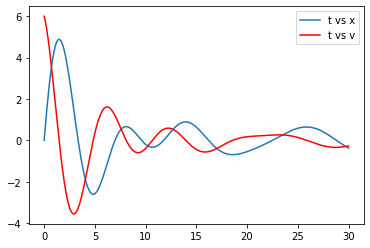

In [45]:
# gráfica (𝑥 y 𝑣 𝑣𝑒𝑟𝑠𝑢𝑠 𝑡)
plt.plot(t, x, label = 't vs x')
# grafica solución exacta
plt.plot(t, v, label = 't vs v', color='red')
plt.legend()

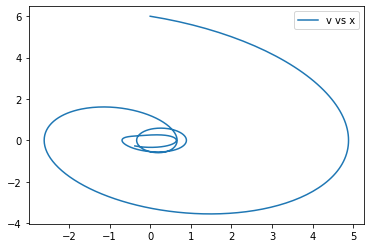

In [46]:
#gráfica del espacio-fase (𝑣 𝑣𝑒𝑟𝑠𝑢𝑠 𝑥)
plt.plot(x, v, label = 'v vs x')
plt.legend()

<h3> Solución para resorte no lineal (𝑘1 = 1; 𝑘3= 0.5)</h3>

In [47]:
# parametros método
a = 0; b = 30; n = 1000
# condiciones iniciales
x0 = 0; v0 = 6
# resolver ecuación con condiciones K1 = 1 y k3 = 0
t, x, v = runge_kutta(f, k, x0, v0, a, b, n)

In [48]:
print('el valor de x(30) es: %f' %(x[-1]))
print('el valor de v(30) es: %f' %(v[-1]))

el valor de x(30) es: -0.330204
el valor de v(30) es: -0.242786


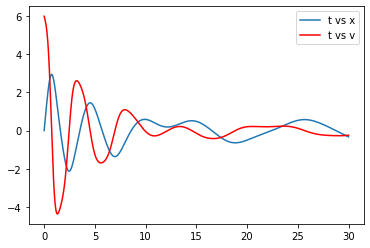

In [49]:
# gráfica (𝑥 y 𝑣 𝑣𝑒𝑟𝑠𝑢𝑠 𝑡)
plt.plot(t, x, label = 't vs x')
# grafica solución exacta
plt.plot(t, v, label = 't vs v', color='red')
plt.legend()

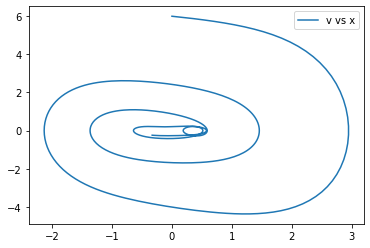

In [50]:
#gráfica del espacio-fase (𝑣 𝑣𝑒𝑟𝑠𝑢𝑠 𝑥)
plt.plot(x, v, label = 'v vs x')
plt.legend()